In [1]:
import sys
sys.path.append("./src")

In [2]:
from src.agents.Actor import Actor
from src.agents.Critic import Critic
import src.trainer as trainer
import src.logger as logger
import src.agents.utils as AgentUtils
import time

In [3]:
# Control random values
import random
import torch
import numpy as np

SEED = 0
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

In [4]:
params = {
    "n_plays": 5000,   
    "lr_actor": 0.0001,
    "lr_critic": 0.0001,
    "save_agent": True,
    "debug": False,
}

start = time.time()

agent, _, path, results = trainer.train_a2c_agent(Actor, Critic, **params)

logger.print_time(start)

100%|██████████| 5000/5000 [05:44<00:00, 14.53it/s]

Checkpoint saved to D:\Albert DC\Documents\UOC\__TFG\TFG-Yahtzee\src\../models/Actor_2025-05-27_10-24-35.rl
Training time: 00:05:44.12


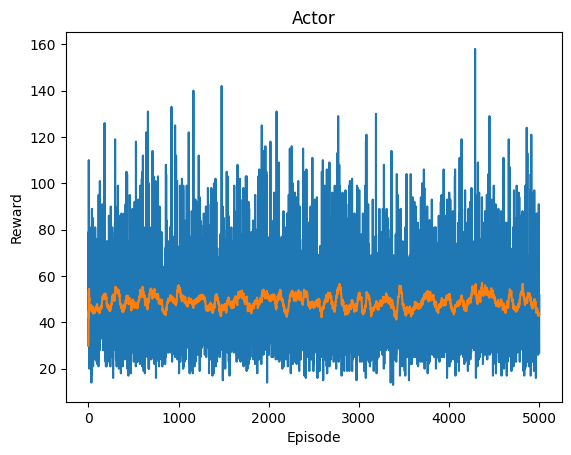

In [5]:
logger.print_train_results(results, agent.name)

In [6]:
# Evaluate agent
agent = AgentUtils.load_agent(path, Actor)

n_plays = 100
avg_score, median_score, scores = trainer.evaluate_model(agent, n_plays)
    
logger.print_eval_results(n_plays, avg_score, median_score)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:01<00:00, 56.80it/s]

Evaluation results:
Score over 100 games
Avg: 47.8, Median: 41.0
